In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')

In [3]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


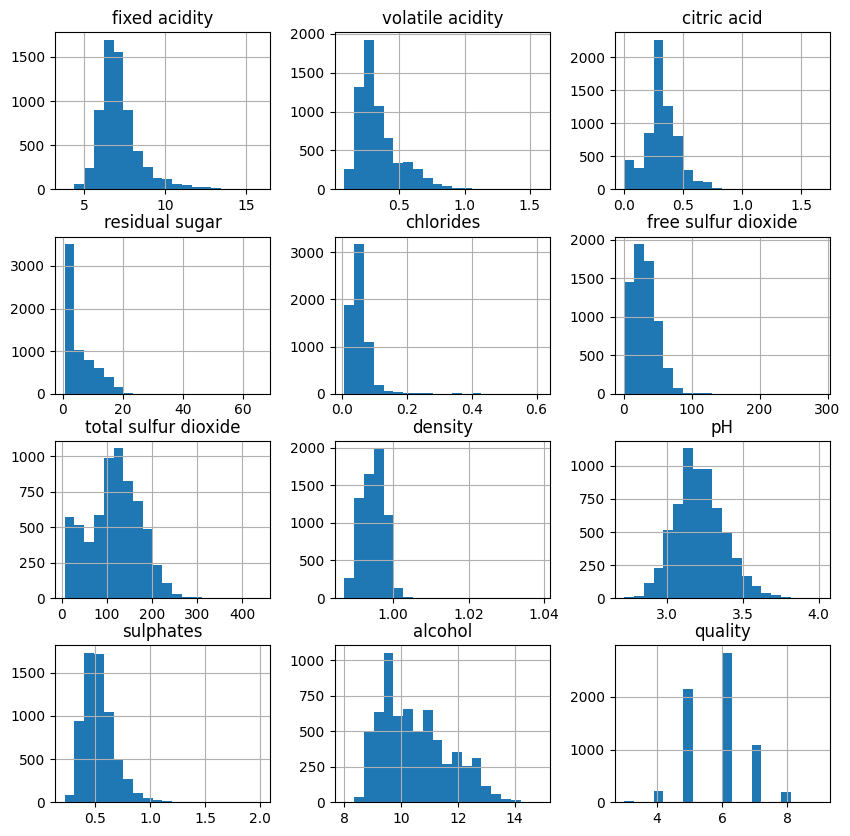

In [5]:
data.hist(bins=20,figsize=(10,10))
plt.show()

In [6]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
data['sulphates']=data['sulphates'].fillna(data['sulphates'].mean())

In [8]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col]=data[col].fillna(data[col].mean())
        
data.isnull().sum().sum()

0

In [9]:
for col in data.columns:
        data[col]=data[col].round(1)
        

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.216577,1.295743,3.8,6.4,7.0,7.7,15.9
volatile acidity,6497.0,0.339341,0.166639,0.1,0.2,0.3,0.4,1.6
citric acid,6497.0,0.318224,0.148982,0.0,0.2,0.3,0.4,1.7
residual sugar,6497.0,5.444390,4.757759,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,0.044374,0.057365,0.0,0.0,0.0,0.1,0.6
free sulfur dioxide,6497.0,30.525319,17.749400,1.0,17.0,29.0,41.0,289.0
total sulfur dioxide,6497.0,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
pH,6497.0,3.218747,0.163690,2.7,3.1,3.2,3.3,4.0
sulphates,6497.0,0.531491,0.151885,0.2,0.4,0.5,0.6,2.0


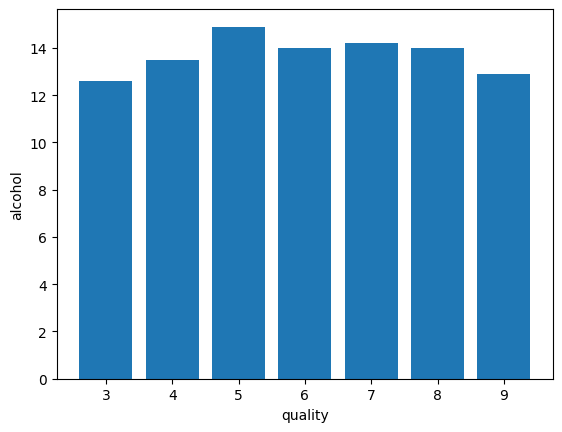

In [12]:
plt.bar(data["quality"],data["alcohol"])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

# There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

In [13]:
data.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.217623,0.315564,-0.112220,0.324055,-0.283231,-0.329408,NaN,-0.245013,0.296016,-0.095615,-0.076982
volatile acidity,0.217623,1.000000,-0.372529,-0.200197,0.408359,-0.351541,-0.413576,NaN,0.258636,0.218539,-0.035334,-0.259897
citric acid,0.315564,-0.372529,1.000000,0.142379,-0.034474,0.135639,0.196738,NaN,-0.326226,0.049400,-0.009012,0.089223
residual sugar,-0.112220,-0.200197,0.142379,1.000000,-0.109680,0.403242,0.495712,NaN,-0.262603,-0.178398,-0.359638,-0.036878
chlorides,0.324055,0.408359,-0.034474,-0.109680,1.000000,-0.243165,-0.317514,NaN,0.112548,0.368221,-0.281896,-0.210619
free sulfur dioxide,-0.283231,-0.351541,0.135639,0.403242,-0.243165,1.000000,0.720934,NaN,-0.149762,-0.183669,-0.179789,0.055463
total sulfur dioxide,-0.329408,-0.413576,0.196738,0.495712,-0.317514,0.720934,1.000000,NaN,-0.241082,-0.270446,-0.265739,-0.041385
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,-0.245013,0.258636,-0.326226,-0.262603,0.112548,-0.149762,-0.241082,NaN,1.000000,0.181694,0.119821,0.018116
sulphates,0.296016,0.218539,0.049400,-0.178398,0.368221,-0.183669,-0.270446,NaN,0.181694,1.000000,-0.003474,0.036630


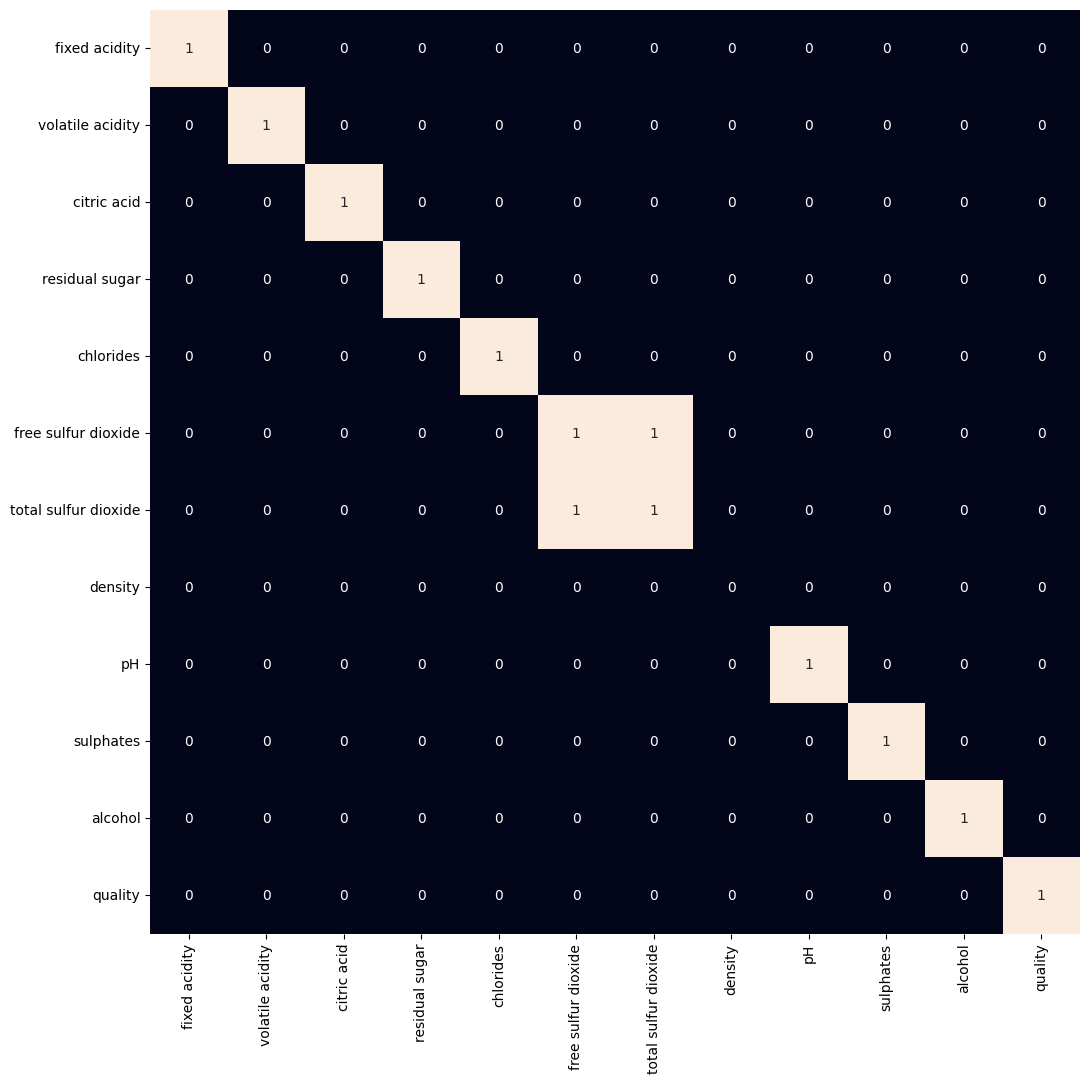

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(numeric_only=True) > 0.7, annot=True, cbar=False)
plt.show()


In [15]:
data= data.drop('total sulfur dioxide', axis=1)


In [16]:
data['best quality'] = [1 if x > 5 else 0 for x in data.quality]


In [17]:
data.replace({'white': 1, 'red': 0}, inplace=True)


/tmp/ipykernel_18/551085683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'white': 1, 'red': 0}, inplace=True)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
features = data.drop(['quality', 'best quality'], axis=1)
target = data['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((5197, 11), (1300, 11))

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()


LogisticRegression() : 
Training Accuracy :  0.693685978557446
Validation Accuracy :  0.6845889396307762

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9432008849712575
Validation Accuracy :  0.7768642535323506

SVC() : 
Training Accuracy :  0.7010086537956125
V